In [3]:
import zipfile

with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [4]:
import pandas as pd

df = pd.read_csv('/content/dataset.csv')
df.head()


,very_dry_skin,sores_that_heal_slowly,more_infections_than_usual,Unnamed: 3,Unnamed: 4,nausea,stomach_pains,Unnamed: 7,urinate_a_lot,feel_very_thirsty,...,high_temperature,chest_pain,aching_body,feeling_very_tired,wheezing_noises_when_you_breathe,Unnamed: 36,Unnamed: 37,Unnamed: 38,feeling_confused,disease
0,1,1,1,NaN,NaN,1,1,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,0,diabetes
1,1,1,1,NaN,NaN,1,1,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,0,diabetes
2,1,1,1,NaN,NaN,1,1,NaN,1,0,...,0,0,0,0,0,NaN,NaN,NaN,0,diabetes
3,1,1,1,NaN,NaN,1,1,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,0,diabetes
4,1,1,1,NaN,NaN,1,1,NaN,1,1,...,0,0,0,0,0,NaN,NaN,NaN,0,diabetes


In [8]:
df.shape
df.info()
df['disease'].value_counts()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   very_dry_skin                      222 non-null    int64  
 1   sores_that_heal_slowly             222 non-null    int64  
 2   more_infections_than_usual         222 non-null    int64  
 3   Unnamed: 3                         0 non-null      float64
 4   Unnamed: 4                         0 non-null      float64
 5   nausea                             222 non-null    int64  
 6   stomach_pains                      222 non-null    int64  
 7   Unnamed: 7                         0 non-null      float64
 8   urinate_a_lot                      222 non-null    int64  
 9   feel_very_thirsty                  222 non-null    int64  
 10  lose_weight_without_trying         222 non-null    int64  
 11  blurry_vision                      222 non-null    int64  

,count
disease,
pneumonia,65
diabetes,64
dengue,61
hepatitas,32


In [11]:
X = df.drop('disease', axis=1)
y = df['disease']
X.shape, y.shape



((222, 40), (222,))

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
X = df.drop('disease', axis=1)

# Drop columns that are completely empty
X = X.dropna(axis=1, how='all')

y = df['disease']


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()


(np.int64(0), np.int64(0))

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)



In [34]:
nb_pred = nb.predict(X_test)


In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Naive Bayes Accuracy: 1.0
Decision Tree Accuracy: 0.9555555555555556
Random Forest Accuracy: 1.0


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

print("Naive Bayes Report\n", classification_report(y_test, nb_pred))
print("Decision Tree Report\n", classification_report(y_test, dt_pred))
print("Random Forest Report\n", classification_report(y_test, rf_pred))


Naive Bayes Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Decision Tree Report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.96      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45

Random Forest Report
               precision    recall  f1-score   support

           

In [39]:
from sklearn.metrics import f1_score

print("Naive Bayes Dice:", f1_score(y_test, nb_pred, average='weighted'))
print("Decision Tree Dice:", f1_score(y_test, dt_pred, average='weighted'))
print("Random Forest Dice:", f1_score(y_test, rf_pred, average='weighted'))


Naive Bayes Dice: 1.0
Decision Tree Dice: 0.9562685680332739
Random Forest Dice: 1.0


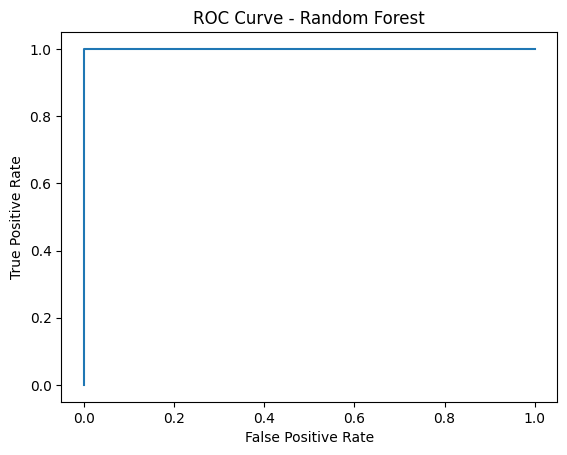

AUC: 1.0


In [40]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=range(len(set(y))))
rf_prob = rf.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), rf_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.show()

print("AUC:", roc_auc)


In [41]:
def predict_disease(symptom_list):
    input_data = {col:0 for col in X.columns}
    for symptom in symptom_list:
        if symptom in input_data:
            input_data[symptom] = 1

    input_df = pd.DataFrame([input_data])
    prediction = rf.predict(input_df)[0]
    disease_name = le.inverse_transform([prediction])[0]
    confidence = max(rf.predict_proba(input_df)[0])

    return disease_name, confidence


In [42]:
sample_symptoms = ['itching', 'skin_rash', 'fatigue', 'weight_loss']
disease, confidence = predict_disease(sample_symptoms)
print("Predicted Disease:", disease)
print("Confidence:", confidence)


Predicted Disease: pneumonia
Confidence: 0.47
